In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier




In [4]:
df_ratings = pd.read_csv("turkish_airlines_ratings.csv")

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2330 entries, 0 to 2459
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Aircraft                844 non-null    object
 1   Type_Of_Traveller       1996 non-null   object
 2   Seat_Type               2330 non-null   object
 3   Route                   1990 non-null   object
 4   Date_Flown              1996 non-null   object
 5   Seat_Comfort            2179 non-null   object
 6   Cabin_Staff_Service     2174 non-null   object
 7   Food_Beverages          2055 non-null   object
 8   Inflight_Entertainment  1897 non-null   object
 9   Ground_Service          1893 non-null   object
 10  Wifi_Connectivity       850 non-null    object
 11  Value_For_Money         2330 non-null   object
 12  Recommended             2330 non-null   object
dtypes: object(13)
memory usage: 254.8+ KB


In [ ]:
df_ratings.head()

,Unnamed: 0,Aircraft,Type_Of_Traveller,Seat_Type,Route,Date_Flown,Seat_Comfort,Cabin_Staff_Service,Food_Beverages,Inflight_Entertainment,Ground_Service,Wifi_Connectivity,Value_For_Money,Recommended
0,0,NaN,Solo Leisure,Economy Class,Valencia to Bangkok via Istanbul,December 2023,1.0,1.0,2.0,NaN,3.0,NaN,1.0,no
1,1,NaN,Solo Leisure,Economy Class,Panama to Bangkok via Miami,December 2022,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
2,2,A350,Family Leisure,Economy Class,Atlanta to Bangkok,November 2023,3.0,5.0,5.0,5.0,1.0,NaN,4.0,yes
3,3,Boeing 747,Solo Leisure,Economy Class,Seattle to Entebbe via Istanbul,November 2023,1.0,1.0,1.0,1.0,1.0,NaN,1.0,no
4,4,NaN,Solo Leisure,First Class,Antalia to Istanbul via Минск,November 2023,2.0,4.0,2.0,2.0,2.0,1.0,1.0,no


In [5]:
df_ratings.duplicated().sum()

0

In [ ]:
df_ratings.drop_duplicates(inplace=True)

In [6]:
df1 = df_ratings.copy()

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2460 non-null   int64  
 1   Aircraft                846 non-null    object 
 2   Type_Of_Traveller       1998 non-null   object 
 3   Seat_Type               2460 non-null   object 
 4   Route                   1992 non-null   object 
 5   Date_Flown              1998 non-null   object 
 6   Seat_Comfort            2309 non-null   float64
 7   Cabin_Staff_Service     2304 non-null   float64
 8   Food_Beverages          2185 non-null   float64
 9   Inflight_Entertainment  2014 non-null   float64
 10  Ground_Service          1895 non-null   float64
 11  Wifi_Connectivity       851 non-null    float64
 12  Value_For_Money         2458 non-null   float64
 13  Recommended             2460 non-null   object 
dtypes: float64(7), int64(1), object(6)
memor

In [8]:
df1 = df1.iloc[:,6:14]

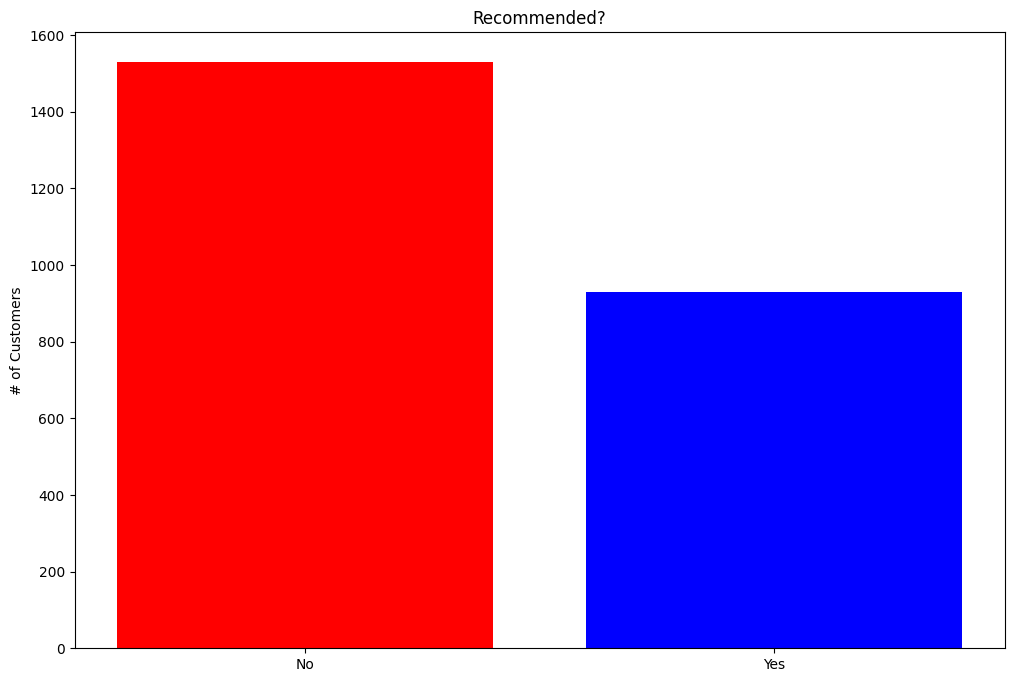

In [9]:
recommendation = df1['Recommended'].value_counts()

plt.figure(figsize=(12,8))
plt.bar(['No', 'Yes'], recommendation, color=['red', 'blue'])
plt.ylabel('# of Customers')
plt.title('Recommended?')
plt.show();

In [10]:
df1['Recommended'] = df1['Recommended'].apply(lambda x: 0 if x == 'no' else 1)


In [11]:
df1 = df1.apply(pd.to_numeric, errors='coerce')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Seat_Comfort            2309 non-null   float64
 1   Cabin_Staff_Service     2304 non-null   float64
 2   Food_Beverages          2185 non-null   float64
 3   Inflight_Entertainment  2014 non-null   float64
 4   Ground_Service          1895 non-null   float64
 5   Wifi_Connectivity       851 non-null    float64
 6   Value_For_Money         2458 non-null   float64
 7   Recommended             2460 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 153.9 KB


In [ ]:
#df1.loc[pd.isna(df1.values), : ]

In [13]:
df1.isnull().sum()

Seat_Comfort               151
Cabin_Staff_Service        156
Food_Beverages             275
Inflight_Entertainment     446
Ground_Service             565
Wifi_Connectivity         1609
Value_For_Money              2
Recommended                  0
dtype: int64

## Train Test Split

In [14]:
X = df1.drop('Recommended', axis=1)
y = df1['Recommended']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# impute missing data

In [16]:
# Fill missing values
my_imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = pd.DataFrame(my_imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(my_imputer.transform(X_test), columns=X_test.columns)

## Logistic Regression

In [42]:
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train_imputed) #scale işlemini sadece X_train uygulanır
X_test_scaled = scaler.transform(X_test_imputed)

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss

In [44]:
log_model = LogisticRegression()

In [45]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [52]:
# Modelin tahmin olasılıklarını hesaplama
y_pred = log_model.predict(X_test_scaled)

In [68]:
y_pred_train = log_model.predict(X_train_scaled)

In [59]:
log_model.score(X_test_scaled, y_test)

0.926829268292683

In [60]:
precision_score(y_test, y_pred)

0.8775510204081632

In [61]:
recall_score(y_test, y_pred)

0.9347826086956522

In [62]:
f1_score(y_test,y_pred)

0.9052631578947369

In [71]:
print("TEST REPORT \n", classification_report(y_test,y_pred))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train))

TEST REPORT 
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       308
           1       0.88      0.93      0.91       184

    accuracy                           0.93       492
   macro avg       0.92      0.93      0.92       492
weighted avg       0.93      0.93      0.93       492

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      1223
           1       0.91      0.91      0.91       745

    accuracy                           0.93      1968
   macro avg       0.93      0.93      0.93      1968
weighted avg       0.93      0.93      0.93      1968



## ROC

In [65]:
from yellowbrick.classifier import ROCAUC

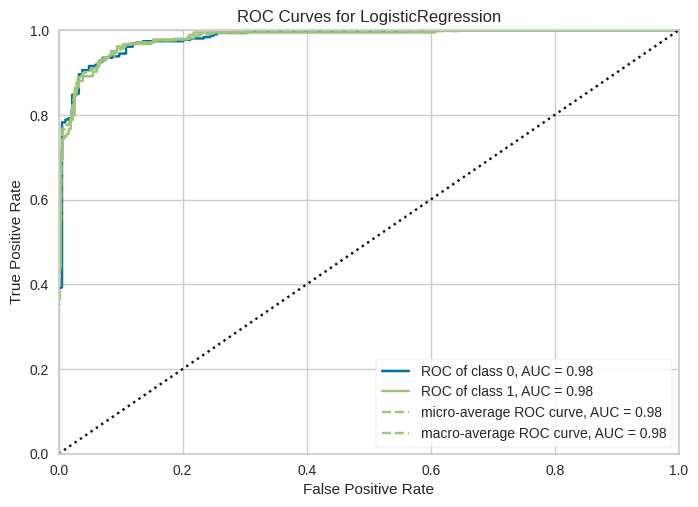

In [67]:
visualizer = ROCAUC(log_model, classes=[str(i) for i in range(10)])

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

## Random Forest

In [40]:
# Create and train the RandomForestRegressor model
model_rf = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)
model_rf.fit(X_train_imputed, y_train)


threshold = 0.50
# Make predictions on the test data
y_pred_train = model_rf.predict(X_train_imputed)
y_pred = model_rf.predict(X_test_imputed)

# Convert predictions to binary classes (for example, set values greater than 0.5 to 1, others to 0)
y_pred_binary = (y_pred > threshold).astype(int)
y_pred_train_binary = (y_pred_train > threshold).astype(int)



# Print Confusion Matrix and Classification Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("\nAccuracy:", accuracy_score(y_test, y_pred_binary))
print("Precision:", precision_score(y_test, y_pred_binary))
print("Recall:", recall_score(y_test, y_pred_binary))
print("F1 Score:", f1_score(y_test, y_pred_binary))


Confusion Matrix:
[[291  17]
 [ 19 165]]

Accuracy: 0.926829268292683
Precision: 0.9065934065934066
Recall: 0.8967391304347826
F1 Score: 0.9016393442622951


In [41]:
print("TEST REPORT \n", classification_report(y_test, y_pred_binary, digits= 3))
print("-*"*30)
print("TRAIN REPORT \n", classification_report(y_train, y_pred_train_binary, digits= 3))

TEST REPORT 
               precision    recall  f1-score   support

           0      0.939     0.945     0.942       308
           1      0.907     0.897     0.902       184

    accuracy                          0.927       492
   macro avg      0.923     0.921     0.922       492
weighted avg      0.927     0.927     0.927       492

-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT 
               precision    recall  f1-score   support

           0      0.943     0.968     0.955      1223
           1      0.945     0.903     0.924       745

    accuracy                          0.944      1968
   macro avg      0.944     0.936     0.940      1968
weighted avg      0.944     0.944     0.943      1968



## Conclusion

Both models have demonstrated a similar level of success, yet they offer distinct advantages that could be preferred in specific problem contexts.

Logistic Regression draws attention with its balanced performance between classes, while Random Forest proves powerful in capturing more complex relationships.

Both models have shown comparable performance on both training and test sets, indicating effective control over overfitting.

The imputation of missing values in the dataset using the 'most_frequent' strategy has positively impacted model performance.

These assessments lay a crucial foundation for understanding model selection and performance.